In [ ]:
import pickle
from functools import partial

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import delayed, Parallel

from utils import bracket_0, rfc_W, tyler_prob_func
from common import Bracket, WinMatrix
from seeding import Seeding
from mcmc import MetropolisHastingsBracket

In [11]:
depop = rfc_W()
depop.cache = {}
mhb = MetropolisHastingsBracket(bracket_0(), win_matrix=depop, simulate_anneal=True)
print(mhb.run(3000)[-1].score())
print(mhb.X[-1])

score: 1.0328010963325764e-14: 100%|██████████| 3000/3000 [02:47<00:00, 17.94it/s]  

1.0328010963325764e-14
Alabama Texas A&M-Corpus Christi Maryland West Virginia San Diego State College of Charleston Virginia Furman Creighton NC State Baylor UC Santa Barbara Missouri Utah State Arizona Princeton Purdue Fairleigh Dickinson Memphis Florida Atlantic Duke Oral Roberts Tennessee Louisiana Kentucky Providence Kansas State Montana State Michigan State Southern California Marquette Vermont Houston Northern Kentucky Iowa Auburn Miami (FL) Drake Indiana Kent State Iowa State Pittsburgh Xavier Kennesaw State Texas A&M Penn State Texas Colgate Kansas Howard Arkansas Illinois Saint Mary's (CA) Virginia Commonwealth Connecticut Iona TCU Arizona State Gonzaga Grand Canyon Northwestern Boise State UCLA UNC Asheville
Alabama Maryland San Diego State Virginia Creighton Baylor Utah State Arizona Purdue Florida Atlantic Duke Tennessee Providence Montana State Michigan State Marquette Houston Iowa Drake Indiana Pittsburgh Xavier Texas A&M Texas Kansas Illinois Saint Mary's (CA) Connectic

In [3]:
bracket = Bracket.NaiveBracket(bracket_0(), rfc_W())
print(bracket.score())
print(bracket)

1.7312309603721477e-15
Alabama Texas A&M-Corpus Christi Maryland West Virginia San Diego State College of Charleston Virginia Furman Creighton NC State Baylor UC Santa Barbara Missouri Utah State Arizona Princeton Purdue Fairleigh Dickinson Memphis Florida Atlantic Duke Oral Roberts Tennessee Louisiana Kentucky Providence Kansas State Montana State Michigan State Southern California Marquette Vermont Houston Northern Kentucky Iowa Auburn Miami (FL) Drake Indiana Kent State Iowa State Pittsburgh Xavier Kennesaw State Texas A&M Penn State Texas Colgate Kansas Howard Arkansas Illinois Saint Mary's (CA) Virginia Commonwealth Connecticut Iona TCU Arizona State Gonzaga Grand Canyon Northwestern Boise State UCLA UNC Asheville
Alabama Maryland San Diego State Virginia Creighton Baylor Utah State Arizona Purdue Memphis Duke Tennessee Kentucky Kansas State Southern California Marquette Houston Iowa Miami (FL) Indiana Iowa State Xavier Texas A&M Texas Kansas Arkansas Saint Mary's (CA) Connecticut

In [9]:
mhb = MetropolisHastingsBracket(bracket_0(), win_matrix=rfc_W(), simulate_anneal=True)
print(mhb.run(3000)[-1].score())
print(mhb.X[-1])

score: 1.0328010963325764e-14: 100%|██████████| 3000/3000 [00:01<00:00, 1779.85it/s]

1.0328010963325764e-14
Alabama Texas A&M-Corpus Christi Maryland West Virginia San Diego State College of Charleston Virginia Furman Creighton NC State Baylor UC Santa Barbara Missouri Utah State Arizona Princeton Purdue Fairleigh Dickinson Memphis Florida Atlantic Duke Oral Roberts Tennessee Louisiana Kentucky Providence Kansas State Montana State Michigan State Southern California Marquette Vermont Houston Northern Kentucky Iowa Auburn Miami (FL) Drake Indiana Kent State Iowa State Pittsburgh Xavier Kennesaw State Texas A&M Penn State Texas Colgate Kansas Howard Arkansas Illinois Saint Mary's (CA) Virginia Commonwealth Connecticut Iona TCU Arizona State Gonzaga Grand Canyon Northwestern Boise State UCLA UNC Asheville
Alabama Maryland San Diego State Virginia Creighton Baylor Utah State Arizona Purdue Florida Atlantic Duke Tennessee Providence Montana State Michigan State Marquette Houston Iowa Drake Indiana Pittsburgh Xavier Texas A&M Texas Kansas Illinois Saint Mary's (CA) Connectic

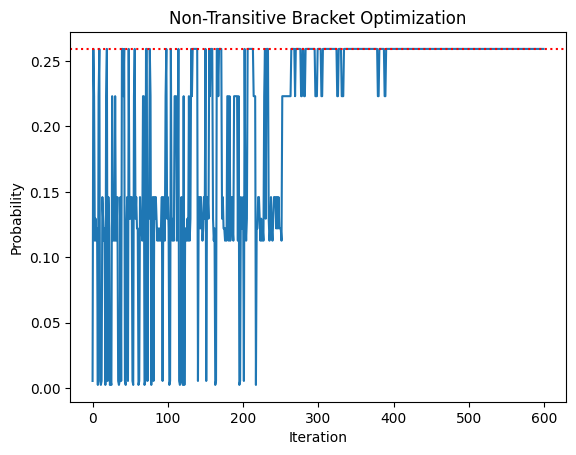

In [22]:
tyler_W = WinMatrix(tyler_prob_func)
with open("./tyler_bracket.pkl", "rb") as doc:
    tyler_bracket_optim = pickle.load(doc)
for i in tyler_bracket_optim:
    i.W = tyler_W
plt.plot([i.score() for i in tyler_bracket_optim[:600]])
plt.xlabel("Iteration")
plt.ylabel("Probability")
plt.axhline(.259308, c="red", linestyle="dotted")
plt.title("Non-Transitive Bracket Optimization")
plt.show()

In [ ]:
W = rfc_W()
b = bracket_0()
_i, _j = np.meshgrid(range(64), range(64))
mat = np.zeros((64, 64))
for (ni, i) in tqdm(list(enumerate(_i))):
    for nj, j in enumerate(_j):
        mat[ni, nj] = W[b[_i[ni, nj]], b[_j[ni, nj]]]
df = pd.DataFrame(mat, columns=[i.name for i in b], index=[i.name + "_l" for i in b])
df.style.background_gradient(cmap='Blues')

100%|██████████| 64/64 [00:10<00:00,  6.11it/s]


,Alabama,Texas A&M-Corpus Christi,Maryland,West Virginia,San Diego State,College of Charleston,Virginia,Furman,Creighton,NC State,Baylor,UC Santa Barbara,Missouri,Utah State,Arizona,Princeton,Purdue,Fairleigh Dickinson,Memphis,Florida Atlantic,Duke,Oral Roberts,Tennessee,Louisiana,Kentucky,Providence,Kansas State,Montana State,Michigan State,Southern California,Marquette,Vermont,Houston,Northern Kentucky,Iowa,Auburn,Miami (FL),Drake,Indiana,Kent State,Iowa State,Pittsburgh,Xavier,Kennesaw State,Texas A&M,Penn State,Texas,Colgate,Kansas,Howard,Arkansas,Illinois,Saint Mary's (CA),Virginia Commonwealth,Connecticut,Iona,TCU,Arizona State,Gonzaga,Grand Canyon,Northwestern,Boise State,UCLA,UNC Asheville
Alabama_l,0.560000,0.360000,0.460000,0.420000,0.540000,0.450000,0.500000,0.460000,0.460000,0.470000,0.460000,0.330000,0.460000,0.460000,0.490000,0.380000,0.510000,0.280000,0.520000,0.430000,0.500000,0.470000,0.440000,0.400000,0.450000,0.480000,0.430000,0.450000,0.440000,0.470000,0.480000,0.380000,0.520000,0.380000,0.420000,0.470000,0.470000,0.420000,0.510000,0.480000,0.440000,0.470000,0.410000,0.400000,0.420000,0.390000,0.500000,0.390000,0.650000,0.340000,0.470000,0.490000,0.530000,0.480000,0.580000,0.460000,0.460000,0.470000,0.520000,0.400000,0.510000,0.470000,0.590000,0.470000
Texas A&M-Corpus Christi_l,0.740000,0.510000,0.620000,0.570000,0.680000,0.670000,0.610000,0.660000,0.660000,0.620000,0.630000,0.590000,0.550000,0.650000,0.740000,0.590000,0.730000,0.400000,0.630000,0.690000,0.640000,0.730000,0.600000,0.610000,0.630000,0.640000,0.530000,0.700000,0.590000,0.640000,0.580000,0.590000,0.720000,0.490000,0.610000,0.600000,0.590000,0.620000,0.660000,0.560000,0.510000,0.600000,0.620000,0.640000,0.560000,0.570000,0.600000,0.610000,0.660000,0.520000,0.570000,0.630000,0.660000,0.540000,0.680000,0.600000,0.560000,0.620000,0.700000,0.560000,0.610000,0.610000,0.680000,0.680000
Maryland_l,0.630000,0.370000,0.480000,0.460000,0.640000,0.410000,0.490000,0.460000,0.540000,0.430000,0.500000,0.410000,0.480000,0.530000,0.570000,0.430000,0.580000,0.320000,0.500000,0.510000,0.460000,0.550000,0.460000,0.450000,0.510000,0.460000,0.450000,0.620000,0.440000,0.460000,0.510000,0.480000,0.600000,0.410000,0.430000,0.520000,0.460000,0.490000,0.520000,0.480000,0.480000,0.450000,0.500000,0.490000,0.400000,0.370000,0.540000,0.490000,0.600000,0.420000,0.520000,0.530000,0.590000,0.410000,0.500000,0.530000,0.490000,0.480000,0.620000,0.390000,0.480000,0.530000,0.570000,0.450000
West Virginia_l,0.610000,0.430000,0.580000,0.520000,0.590000,0.430000,0.510000,0.510000,0.570000,0.490000,0.510000,0.470000,0.440000,0.570000,0.630000,0.510000,0.600000,0.290000,0.480000,0.550000,0.590000,0.500000,0.500000,0.500000,0.600000,0.600000,0.400000,0.600000,0.500000,0.510000,0.500000,0.500000,0.630000,0.420000,0.480000,0.480000,0.460000,0.500000,0.570000,0.490000,0.420000,0.530000,0.520000,0.510000,0.450000,0.460000,0.490000,0.540000,0.590000,0.420000,0.460000,0.540000,0.560000,0.480000,0.550000,0.450000,0.470000,0.510000,0.610000,0.410000,0.510000,0.590000,0.570000,0.470000
San Diego State_l,0.560000,0.380000,0.430000,0.400000,0.500000,0.450000,0.480000,0.480000,0.420000,0.430000,0.440000,0.380000,0.460000,0.450000,0.450000,0.410000,0.480000,0.300000,0.470000,0.480000,0.480000,0.560000,0.420000,0.470000,0.420000,0.450000,0.430000,0.500000,0.420000,0.410000,0.460000,0.420000,0.560000,0.390000,0.390000,0.420000,0.430000,0.470000,0.500000,0.520000,0.420000,0.400000,0.430000,0.440000,0.400000,0.370000,0.470000,0.410000,0.600000,0.370000,0.460000,0.440000,0.510000,0.440000,0.520000,0.460000,0.440000,0.420000,0.510000,0.390000,0.460000,0.450000,0.570000,0.490000
College of Charleston_l,0.630000,0.350000,0.380000,0.430000,0.520000,0.520000,0.490000,0.390000,0.450000,0.450000,0.530000,0.330000,0.410000,0.390000,0.490000,0.340000,0.540000,0.300000,0.480000,0.580000,0.440000,0.560000,0.510000,0.400000,0.440000,0.410000,0.520000,0.330000,0.420000,0.500000,0.420000,0.350000,0.540000,0.280000,0

In [14]:
W = rfc_W()
b = bracket_0()
__i, _j = np.meshgrid(range(64), range(64))
mat = np.zeros((64, 64))
_mat = np.zeros((64, 64))
for (ni, i) in tqdm(list(enumerate(__i))):
    for nj, j in enumerate(_j):
        _mat[ni, nj] = W[b[__i[ni, nj]], b[_j[ni, nj]]]
for (ni, i) in enumerate(__i):
    for nj, j in enumerate(_j):
        mat[ni, nj] = (_mat[ni, nj] + 1 - _mat[nj, ni])/2
_df = pd.DataFrame(mat, columns=[i.name for i in b], index=[i.name + "_l" for i in b])
_df.style.background_gradient(cmap='Blues')

100%|██████████| 64/64 [00:10<00:00,  6.16it/s]


,Alabama,Texas A&M-Corpus Christi,Maryland,West Virginia,San Diego State,College of Charleston,Virginia,Furman,Creighton,NC State,Baylor,UC Santa Barbara,Missouri,Utah State,Arizona,Princeton,Purdue,Fairleigh Dickinson,Memphis,Florida Atlantic,Duke,Oral Roberts,Tennessee,Louisiana,Kentucky,Providence,Kansas State,Montana State,Michigan State,Southern California,Marquette,Vermont,Houston,Northern Kentucky,Iowa,Auburn,Miami (FL),Drake,Indiana,Kent State,Iowa State,Pittsburgh,Xavier,Kennesaw State,Texas A&M,Penn State,Texas,Colgate,Kansas,Howard,Arkansas,Illinois,Saint Mary's (CA),Virginia Commonwealth,Connecticut,Iona,TCU,Arizona State,Gonzaga,Grand Canyon,Northwestern,Boise State,UCLA,UNC Asheville
Alabama_l,0.500000,0.310000,0.415000,0.405000,0.490000,0.410000,0.465000,0.360000,0.420000,0.395000,0.430000,0.345000,0.360000,0.390000,0.415000,0.330000,0.495000,0.255000,0.425000,0.360000,0.395000,0.375000,0.430000,0.330000,0.395000,0.385000,0.415000,0.340000,0.390000,0.390000,0.440000,0.345000,0.520000,0.320000,0.355000,0.390000,0.395000,0.335000,0.445000,0.380000,0.400000,0.360000,0.340000,0.295000,0.380000,0.380000,0.440000,0.305000,0.515000,0.305000,0.415000,0.390000,0.540000,0.400000,0.520000,0.385000,0.390000,0.395000,0.480000,0.335000,0.445000,0.420000,0.555000,0.355000
Texas A&M-Corpus Christi_l,0.690000,0.500000,0.625000,0.570000,0.650000,0.660000,0.600000,0.605000,0.640000,0.600000,0.665000,0.590000,0.535000,0.625000,0.690000,0.540000,0.710000,0.420000,0.600000,0.645000,0.605000,0.685000,0.630000,0.595000,0.645000,0.610000,0.600000,0.610000,0.575000,0.620000,0.655000,0.570000,0.680000,0.500000,0.575000,0.570000,0.605000,0.595000,0.655000,0.570000,0.540000,0.570000,0.620000,0.585000,0.580000,0.540000,0.645000,0.575000,0.665000,0.480000,0.570000,0.610000,0.680000,0.565000,0.685000,0.565000,0.535000,0.565000,0.665000,0.515000,0.580000,0.605000,0.685000,0.640000
Maryland_l,0.585000,0.375000,0.500000,0.440000,0.605000,0.515000,0.510000,0.455000,0.490000,0.470000,0.525000,0.400000,0.440000,0.505000,0.520000,0.360000,0.560000,0.320000,0.485000,0.520000,0.465000,0.550000,0.475000,0.430000,0.505000,0.460000,0.530000,0.480000,0.415000,0.470000,0.560000,0.420000,0.635000,0.390000,0.420000,0.450000,0.480000,0.465000,0.525000,0.470000,0.435000,0.430000,0.485000,0.405000,0.445000,0.375000,0.560000,0.405000,0.555000,0.385000,0.485000,0.465000,0.615000,0.475000,0.540000,0.470000,0.405000,0.440000,0.580000,0.375000,0.470000,0.530000,0.595000,0.415000
West Virginia_l,0.595000,0.430000,0.560000,0.500000,0.595000,0.500000,0.550000,0.485000,0.500000,0.500000,0.530000,0.510000,0.465000,0.550000,0.575000,0.480000,0.595000,0.355000,0.490000,0.560000,0.575000,0.560000,0.540000,0.495000,0.560000,0.545000,0.515000,0.530000,0.460000,0.505000,0.570000,0.490000,0.650000,0.435000,0.440000,0.430000,0.490000,0.495000,0.550000,0.510000,0.460000,0.495000,0.505000,0.495000,0.505000,0.455000,0.550000,0.510000,0.575000,0.410000,0.475000,0.510000,0.620000,0.515000,0.580000,0.485000,0.450000,0.475000,0.585000,0.425000,0.525000,0.570000,0.620000,0.500000
San Diego State_l,0.510000,0.350000,0.395000,0.405000,0.500000,0.465000,0.435000,0.430000,0.400000,0.385000,0.435000,0.385000,0.350000,0.425000,0.425000,0.345000,0.485000,0.295000,0.420000,0.430000,0.415000,0.480000,0.410000,0.430000,0.395000,0.415000,0.440000,0.395000,0.365000,0.385000,0.455000,0.375000,0.580000,0.355000,0.355000,0.360000,0.410000,0.420000,0.455000,0.440000,0.400000,0.340000,0.395000,0.360000,0.400000,0.335000,0.435000,0.340000,0.495000,0.345000,0.425000,0.360000,0.530000,0.420000,0.470000,0.390000,0.380000,0.370000,0.490000,0.345000,0.415000,0.420000,0.570000,0.395000
College of Charleston_l,0.590000,0.340000,0.485000,0.500000,0.535000,0.500000,0.510000,0.380000,0.525000,0.430000,0.605000,0.365000,0.355000,0.410000,0.575000,0.350000,0.640000,0.310000,0.415000,0.480000,0.490000,0.520000,0.620000,0.380000,0.505000,0.440000,0.565000,0.320000,0.455000,0.475000,0.520000,0.365000,0.570000,0.330000,0

In [16]:
_df.loc[["Alabama_l", "Kansas_l", "San Diego State_l"], ["Alabama", "Kansas", "San Diego State"]]

,Alabama,Kansas,San Diego State
Alabama_l,0.500,0.515,0.490
Kansas_l,0.485,0.500,0.505
San Diego State_l,0.510,0.495,0.500


In [11]:
nontransitives = 0
for (ni, i) in tqdm(list(enumerate(__i))):
    for (nj, j) in enumerate(__i):
        for (ng, g) in enumerate(__i):
            if mat[ni, nj] > .5 and mat[nj, ng] > .5 and mat[ng, ni] > .5:
                print(df.columns[ni], df.columns[nj], df.columns[ng])
                nontransitives += 1
print(nontransitives, nontransitives/64**3)

100%|██████████| 64/64 [00:00<00:00, 939.67it/s]

Alabama Kansas San Diego State
Alabama Connecticut San Diego State
Alabama Connecticut Texas
Alabama Connecticut Gonzaga
Texas A&M-Corpus Christi Missouri Howard
Maryland College of Charleston Creighton
Maryland College of Charleston Tennessee
Maryland College of Charleston Iowa State
Maryland College of Charleston Xavier
Maryland College of Charleston Arkansas
Maryland College of Charleston Northwestern
Maryland Virginia Creighton
Maryland Virginia Tennessee
Maryland Utah State Creighton
Maryland Utah State Duke
Maryland Utah State Tennessee
Maryland Utah State Virginia Commonwealth
Maryland Florida Atlantic Tennessee
Maryland Florida Atlantic Xavier
Maryland Oral Roberts Tennessee
Maryland Oral Roberts Arkansas
Maryland Kentucky NC State
Maryland Kentucky Memphis
Maryland Kentucky Miami (FL)
Maryland Kentucky Virginia Commonwealth
Maryland Kansas State Duke
Maryland Kansas State Tennessee
Maryland Kansas State Arkansas
Maryland Boise State Tennessee
Maryland Boise State Northwestern


In [5]:
d = df.T.mean().sort_values()
t = [list(filter(lambda x: x.name == i.split("_")[0], b))[0] for i in d.index.tolist()]
s = Seeding(t, W)
print(s)
print(s.mean_variance(iters=100000))
print(s.find_maximimum_likelihood_bracket(iters=3000, verbose=True).score())
print(s.mlb.depth_error())
print(s.mlb.outcome_error(s))

(1) Houston
(1) Saint Mary's (CA)
(1) UCLA
(1) Marquette
(2) Purdue
(2) Connecticut
(2) College of Charleston
(2) Kansas State
(3) Texas
(3) Baylor
(3) San Diego State
(3) Tennessee
(4) Gonzaga
(4) Alabama
(4) Kansas
(4) Indiana
(5) Virginia
(5) Oral Roberts
(5) Maryland
(5) Boise State
(6) Florida Atlantic
(6) Kentucky
(6) Arizona
(6) Creighton
(7) Virginia Commonwealth
(7) West Virginia
(7) Texas A&M
(7) Arkansas
(8) Utah State
(8) Northwestern
(8) Miami (FL)
(8) UC Santa Barbara
(9) Duke
(9) Iowa State
(9) Xavier
(9) NC State
(10) Providence
(10) Southern California
(10) Michigan State
(10) Memphis
(11) Furman
(11) Kent State
(11) Illinois
(11) Arizona State
(12) Iowa
(12) TCU
(12) Louisiana
(12) Drake
(13) Penn State
(13) Vermont
(13) Iona
(13) Auburn
(14) Pittsburgh
(14) UNC Asheville
(14) Northern Kentucky
(14) Missouri
(15) Texas A&M-Corpus Christi
(15) Grand Canyon
(15) Howard
(15) Colgate
(16) Princeton
(16) Montana State
(16) Kennesaw State
(16) Fairleigh Dickinson


score: 8.518373682191089e-18: 100%|██████████| 100000/100000 [00:54<00:00, 1841.49it/s]


-281.2330269811499


score: 5.672201873522068e-15: 100%|██████████| 3000/3000 [00:01<00:00, 2260.44it/s]


5.672201873522068e-15
129
138


In [6]:
ncaa_seed = Seeding(Seeding.inverse_arrange(bracket_0()), W)
print(ncaa_seed)
print(ncaa_seed.mean_variance(iters=100000))
print(ncaa_seed.find_maximimum_likelihood_bracket(iters=3000, verbose=True).score())
print(ncaa_seed.mlb.depth_error())
print(ncaa_seed.mlb.outcome_error(ncaa_seed))

(1) Alabama
(1) Houston
(1) Kansas
(1) Purdue
(2) UCLA
(2) Texas
(2) Arizona
(2) Marquette
(3) Baylor
(3) Gonzaga
(3) Kansas State
(3) Xavier
(4) Connecticut
(4) Tennessee
(4) Indiana
(4) Virginia
(5) San Diego State
(5) Duke
(5) Saint Mary's (CA)
(5) Miami (FL)
(6) Iowa State
(6) Creighton
(6) Kentucky
(6) TCU
(7) Texas A&M
(7) Michigan State
(7) Missouri
(7) Northwestern
(8) Memphis
(8) Arkansas
(8) Maryland
(8) Iowa
(9) Florida Atlantic
(9) West Virginia
(9) Auburn
(9) Illinois
(10) Boise State
(10) Penn State
(10) Southern California
(10) Utah State
(11) NC State
(11) Providence
(11) Pittsburgh
(11) Arizona State
(12) College of Charleston
(12) Oral Roberts
(12) Drake
(12) Virginia Commonwealth
(13) Kent State
(13) Iona
(13) Furman
(13) Louisiana
(14) Kennesaw State
(14) UC Santa Barbara
(14) Grand Canyon
(14) Montana State
(15) Vermont
(15) Colgate
(15) Princeton
(15) UNC Asheville
(16) Fairleigh Dickinson
(16) Howard
(16) Northern Kentucky
(16) Texas A&M-Corpus Christi


score: 8.459134582489102e-19: 100%|██████████| 100000/100000 [00:50<00:00, 1997.96it/s]


-279.148098867578


score: 7.093458620662113e-15: 100%|██████████| 3000/3000 [00:01<00:00, 1784.10it/s]


7.093458620662113e-15
127
148


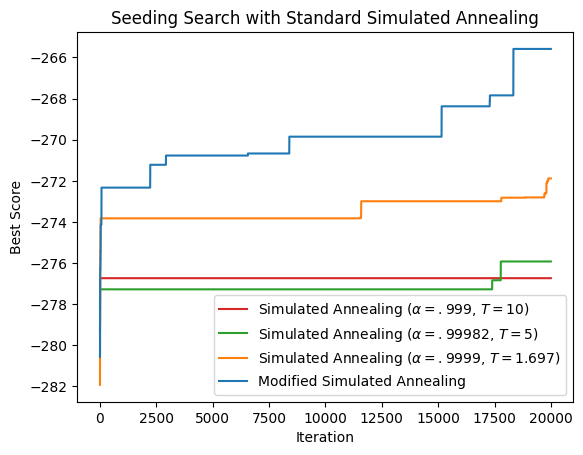

In [ ]:
plt.title("Seeding Search with Standard Simulated Annealing")
plt.ylabel("Best Score")
plt.xlabel("Iteration")
with open("./seeding_anneal0.pkl", "rb") as doc:
    _anneal_seed = [i._score for i in pickle.load(doc) if i._score is not None]
plt.plot([np.max(_anneal_seed[:i+1]) for i in range(len(_anneal_seed))], label="Simulated Annealing ($\\alpha=.999$, $T=10$)", c=plt.rcParams['axes.prop_cycle'].by_key()['color'][3])
with open("./seeding_anneal2.pkl", "rb") as doc:
    _anneal_seed = [i._score for i in pickle.load(doc) if i._score is not None]
plt.plot([np.max(_anneal_seed[:i+1]) for i in range(len(_anneal_seed))], label="Simulated Annealing ($\\alpha=.99982$, $T=5$)", c=plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
with open("./seeding_anneal3.pkl", "rb") as doc:
    _anneal_seed = [i._score for i in pickle.load(doc) if i._score is not None]
plt.plot([np.max(_anneal_seed[:i+1]) for i in range(len(_anneal_seed))], label="Simulated Annealing ($\\alpha=.9999$, $T=1.697$)", c=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = [i._score for i in pickle.load(doc) if i._score is not None][:20000]
plt.plot([np.max(_optimal_seed[:i+1]) for i in range(len(_optimal_seed))], label="Modified Simulated Annealing", c=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plt.legend()
plt.show()

[-265.5832836519396, -266.0067877520398, -266.1621224099787, -266.1842491465035, -266.32071874726483, -266.51932607995536, -267.0496586168245, -267.13666805325664, -267.26164521398886, -267.2841957442484, -267.49778406203103, -267.5647113629887, -267.8055958316656, -267.8429594971389, -267.8732799897813, -267.8754014842269, -267.8867710382485, -267.9860449658699, -267.9872377658715, -268.02586795795554, -268.033821963864, -268.07154758718605, -268.0937914458235, -268.1038569317781, -268.14142886288727, -268.20691973763246, -268.21473863940713, -268.24723289665377, -268.3004924516474, -268.32785673174817, -268.3750255820653, -268.4239920516815, -268.44384390871335, -268.44705490789755, -268.4563472843261, -268.4790445186249, -268.5048913338228, -268.73132544952455, -268.7410091795204, -268.7502196963656, -268.7664405060469, -268.8917696598929, -268.9017006058539, -268.91429724639147, -268.97410576029074, -269.01106677276664, -269.0212075276317, -269.0420374147822, -269.048732905009, -26

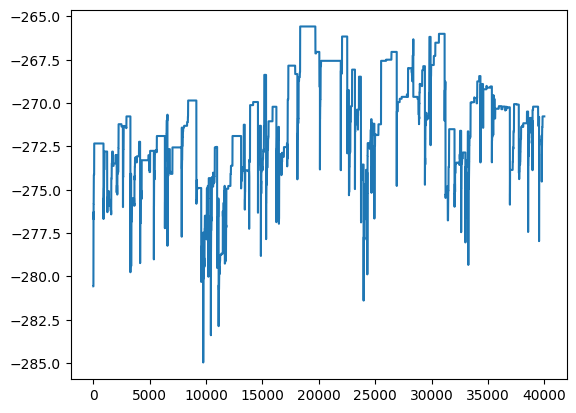

100%|██████████| 10/10 [00:00<00:00, 559.13it/s]


[-273.15385612377133, -269.8750009769947, -270.94529546790557, -272.87000692696023, -272.192584412732, -269.43814631091254, -270.4415696928278, -270.7260955808499, -271.59671733178556, -272.3419817742851]


In [ ]:
TOP_K = 10
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = pickle.load(doc)
optimal_seed = []
scores = []
for s in _optimal_seed:
    if s._score not in scores and s._score is not None:
        optimal_seed.append(s)
        scores.append(s._score)
print(sorted(scores, reverse=True))
plt.plot([i._score for i in _optimal_seed])
plt.show()
optimal_seed = [i[-1] for i in sorted([(i._score if i._score is not None else -1000000, n, i) for n, i in enumerate(optimal_seed)])[-TOP_K:]]
for seed in optimal_seed:
    seed._score = None
    seed.win_matrix = W
def mv(x):
    return x.mean_variance(iters=100000)
scores = Parallel(n_jobs=8)(delayed(partial(x.mean_variance, iters=100000, verbose=False))() for x in tqdm(optimal_seed))
optimal_seed = optimal_seed[np.argmax(scores)]
print(scores)

[-265.5832836519396, -266.0067877520398, -266.1621224099787, -266.1842491465035, -266.32071874726483, -266.51932607995536, -267.0496586168245, -267.13666805325664, -267.26164521398886, -267.2841957442484, -267.49778406203103, -267.5647113629887, -267.8055958316656, -267.8429594971389, -267.8732799897813, -267.8754014842269, -267.8867710382485, -267.9860449658699, -267.9872377658715, -268.02586795795554, -268.033821963864, -268.07154758718605, -268.0937914458235, -268.1038569317781, -268.14142886288727, -268.20691973763246, -268.21473863940713, -268.24723289665377, -268.3004924516474, -268.32785673174817, -268.3750255820653, -268.4239920516815, -268.44384390871335, -268.44705490789755, -268.4563472843261, -268.4790445186249, -268.5048913338228, -268.73132544952455, -268.7410091795204, -268.7502196963656, -268.7664405060469, -268.8917696598929, -268.9017006058539, -268.91429724639147, -268.97410576029074, -269.01106677276664, -269.0212075276317, -269.0420374147822, -269.048732905009, -26

Text(0, 0.5, 'Score')

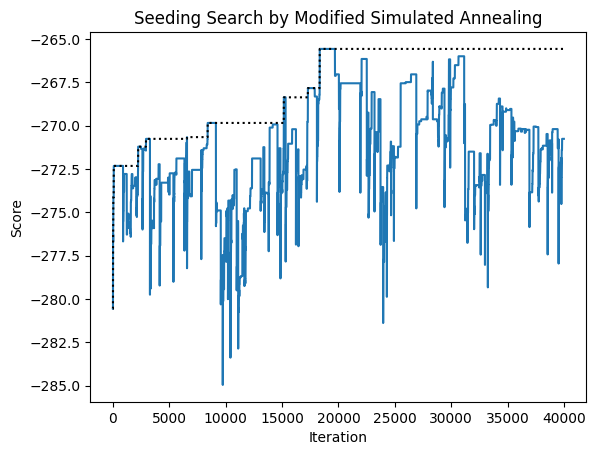

In [ ]:
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = pickle.load(doc)
optimal_seed = []
scores = []
for s in _optimal_seed:
    if s._score not in scores and s._score is not None:
        optimal_seed.append(s)
        scores.append(s._score)
print(sorted(scores, reverse=True))
_s = [i._score for i in _optimal_seed if i._score is not None]
plt.plot(_s)
plt.plot([np.max(_s[:i+1]) for i, _ in enumerate(_s)], c="black", linestyle="dotted")
plt.title("Seeding Search by Modified Simulated Annealing")
plt.xlabel("Iteration")
plt.ylabel("Score")

[-265.5832836519396, -266.0067877520398, -266.1621224099787, -266.1842491465035, -266.32071874726483, -266.51932607995536, -267.0496586168245, -267.13666805325664, -267.26164521398886, -267.2841957442484, -267.49778406203103, -267.5647113629887, -267.8055958316656, -267.8429594971389, -267.8732799897813, -267.8754014842269, -267.8867710382485, -267.9860449658699, -267.9872377658715, -268.02586795795554, -268.033821963864, -268.07154758718605, -268.0937914458235, -268.1038569317781, -268.14142886288727, -268.20691973763246, -268.21473863940713, -268.24723289665377, -268.3004924516474, -268.32785673174817, -268.3750255820653, -268.4239920516815, -268.44384390871335, -268.44705490789755, -268.4563472843261, -268.4790445186249, -268.5048913338228, -268.73132544952455, -268.7410091795204, -268.7502196963656, -268.7664405060469, -268.8917696598929, -268.9017006058539, -268.91429724639147, -268.97410576029074, -269.01106677276664, -269.0212075276317, -269.0420374147822, -269.048732905009, -26

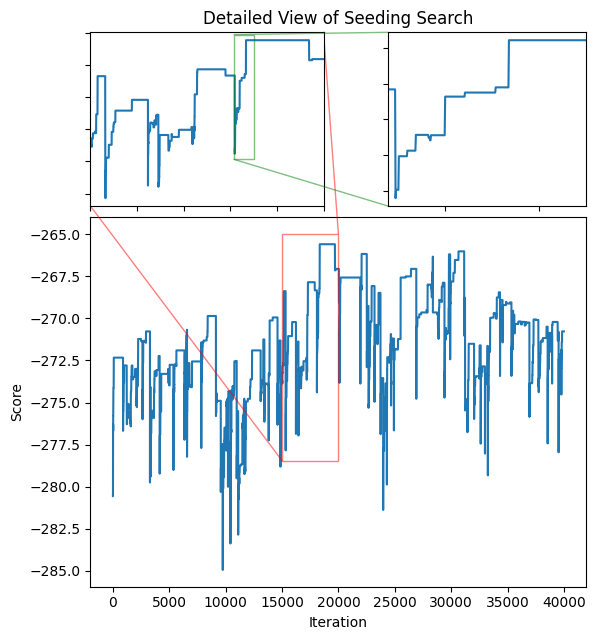

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots()
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = pickle.load(doc)
optimal_seed = []
scores = []
for s in _optimal_seed:
    if s._score not in scores and s._score is not None:
        optimal_seed.append(s)
        scores.append(s._score)
print(sorted(scores, reverse=True))
_s = [i._score for i in _optimal_seed if i._score is not None]
ax.plot(_s)
ax.set_title("Detailed View of Seeding Search")
ax.set_xlabel("Iteration")
ax.set_ylabel("Score")
RANGE1 = (15000, 20000)
axins = ax.inset_axes([0, 1.03, 0.47, 0.47], xlim=RANGE1, xticklabels=[], yticklabels=[])
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = pickle.load(doc)[RANGE1[0]:RANGE1[1]]
optimal_seed = []
scores = []
for s in _optimal_seed:
    if s._score not in scores and s._score is not None:
        optimal_seed.append(s)
        scores.append(s._score)
print(sorted(scores, reverse=True))
_s = [i._score for i in _optimal_seed if i._score is not None]
axins.plot(range(*RANGE1), _s)
ax.indicate_inset_zoom(axins, edgecolor="red")
RANGE1 = (18080, 18500)
axins2 = ax.inset_axes([0.6, 1.03, 0.4, 0.47], xlim=RANGE1, xticklabels=[], yticklabels=[])
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = pickle.load(doc)[RANGE1[0]:RANGE1[1]]
optimal_seed = []
scores = []
for s in _optimal_seed:
    if s._score not in scores and s._score is not None:
        optimal_seed.append(s)
        scores.append(s._score)
print(sorted(scores, reverse=True))
_s = [i._score for i in _optimal_seed if i._score is not None]
axins2.plot(range(*RANGE1), _s)
axins.indicate_inset_zoom(axins2, edgecolor="green")
plt.draw()
plt.show()

[-265.5832836519396, -267.0496586168245, -267.13666805325664, -267.8429594971389, -268.0937914458235, -268.21473863940713, -268.32785673174817, -268.3750255820653, -268.5048913338228, -268.73132544952455, -269.78656053890603, -270.2130133857692, -270.8672648639479, -270.8863475306782, -271.0169240415966, -271.05059673650976, -271.1685515509596, -271.33952550000305, -271.3729197993231, -271.4484549660211, -271.4806901497486, -271.5057481456809, -271.7067799625806, -271.74835987876446, -271.8326526653584, -271.9194197846547, -271.9350209475114, -271.9821521444784, -272.0467483656287, -272.05162352115735, -272.0592038455934, -272.0593258271112, -272.14600048147224, -272.28414921041235, -272.3272999284374, -272.33307071755763, -272.35033682052125, -272.39670977849664, -272.5401565290536, -272.5637288580966, -272.6126120459126, -272.6195044314158, -272.65725396223286, -272.69969182989513, -272.7402564956416, -272.75668028162266, -272.7951347719924, -272.8086683545458, -272.8250199027154, -2

Text(0, 0.5, 'Score')

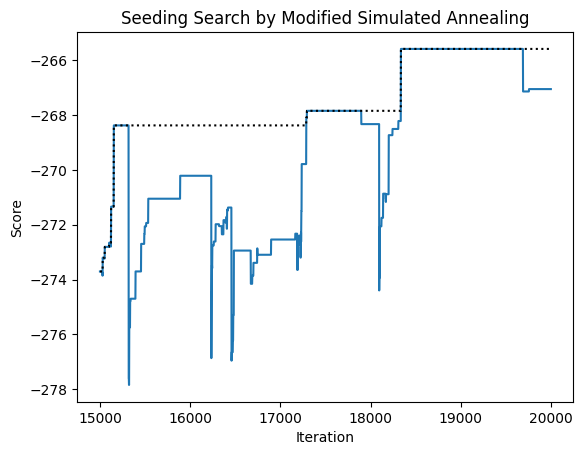

In [ ]:
RANGE = (15000, 20000)
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = pickle.load(doc)[RANGE[0]:RANGE[1]]
optimal_seed = []
scores = []
for s in _optimal_seed:
    if s._score not in scores and s._score is not None:
        optimal_seed.append(s)
        scores.append(s._score)
print(sorted(scores, reverse=True))
_s = [i._score for i in _optimal_seed if i._score is not None]
plt.plot(range(*RANGE), _s)
plt.plot(range(*RANGE), [np.max(_s[:i+1]) for i, _ in enumerate(_s)], c="black", linestyle="dotted")
plt.title("Seeding Search by Modified Simulated Annealing")
plt.xlabel("Iteration")
plt.ylabel("Score")

[-265.5832836519396, -268.21473863940713, -268.32785673174817, -268.5048913338228, -268.73132544952455, -270.8672648639479, -270.8863475306782, -271.0169240415966, -271.1685515509596, -271.74835987876446, -272.0593258271112, -273.9332872562607, -274.39804147083055]


Text(0, 0.5, 'Score')

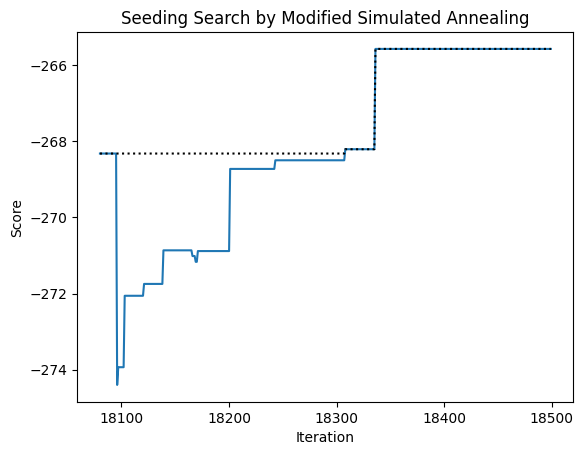

In [ ]:
RANGE = (18080, 18500)
with open("./seeding_optim_for_use.pkl", "rb") as doc:
    _optimal_seed = pickle.load(doc)[RANGE[0]:RANGE[1]]
optimal_seed = []
scores = []
for s in _optimal_seed:
    if s._score not in scores and s._score is not None:
        optimal_seed.append(s)
        scores.append(s._score)
print(sorted(scores, reverse=True))
_s = [i._score for i in _optimal_seed if i._score is not None]
plt.plot(range(*RANGE), _s)
plt.plot(range(*RANGE), [np.max(_s[:i+1]) for i, _ in enumerate(_s)], c="black", linestyle="dotted")
plt.title("Seeding Search by Modified Simulated Annealing")
plt.xlabel("Iteration")
plt.ylabel("Score")

In [11]:
optimal_seed.win_matrix = W
print(optimal_seed)
print(optimal_seed.mean_variance(iters=100000))
print(optimal_seed.find_maximimum_likelihood_bracket(iters=3000, verbose=True).score())
print(optimal_seed.mlb.depth_error())
print(optimal_seed.mlb.outcome_error(optimal_seed))

(1) Marquette
(1) Alabama
(1) Houston
(1) Connecticut
(2) UCLA
(2) Baylor
(2) Kansas
(2) Gonzaga
(3) Tennessee
(3) Florida Atlantic
(3) Saint Mary's (CA)
(3) Purdue
(4) College of Charleston
(4) Kentucky
(4) Oral Roberts
(4) San Diego State
(5) Texas
(5) Virginia
(5) Creighton
(5) Virginia Commonwealth
(6) Maryland
(6) Boise State
(6) Northwestern
(6) Arizona
(7) Arkansas
(7) Kansas State
(7) Indiana
(7) Duke
(8) Drake
(8) Xavier
(8) Iowa State
(8) Utah State
(9) West Virginia
(9) Pittsburgh
(9) Southern California
(9) Michigan State
(10) Memphis
(10) Miami (FL)
(10) Furman
(10) Texas A&M
(11) UC Santa Barbara
(11) Kent State
(11) Providence
(11) Auburn
(12) Vermont
(12) Iowa
(12) NC State
(12) Illinois
(13) Louisiana
(13) Penn State
(13) Arizona State
(13) TCU
(14) Texas A&M-Corpus Christi
(14) UNC Asheville
(14) Missouri
(14) Iona
(15) Colgate
(15) Grand Canyon
(15) Northern Kentucky
(15) Montana State
(16) Howard
(16) Princeton
(16) Kennesaw State
(16) Fairleigh Dickinson


score: 2.4875683640290394e-17: 100%|██████████| 100000/100000 [00:58<00:00, 1714.83it/s]


-270.0978440435142


score: 1.8418488644498387e-14: 100%|██████████| 3000/3000 [00:01<00:00, 2282.55it/s]


1.8418488644498387e-14
99
138


In [33]:
dists = []
for i in range(20):
    ncaa_seed.mean_variance(100000)
    dists.append(ncaa_seed.dist)

score: 3.817733047972219e-17: 100%|██████████| 100000/100000 [00:59<00:00, 1677.84it/s]


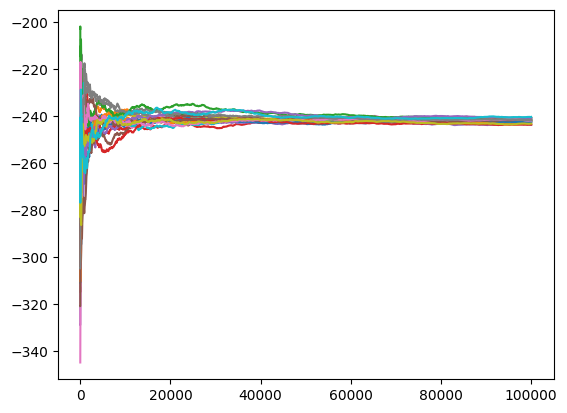

In [ ]:
dists = np.array(dists)
means = [[np.mean(d[:i+1], axis=-1) for i in range(len(d))] for d in dists]
for mean in means:
    plt.plot(mean)

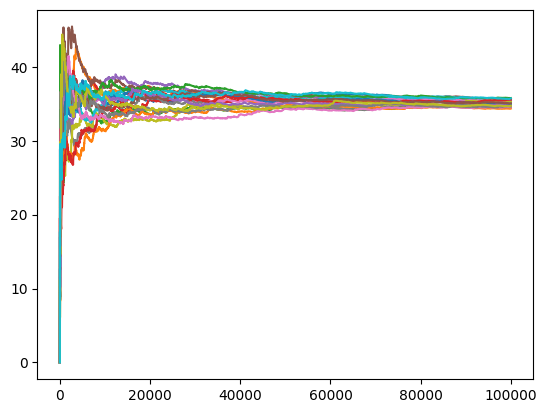

In [35]:
dists = np.array(dists)
stds = [[np.std(d[:i+1], axis=-1) for i in range(len(d))] for d in dists]
for std in stds:
    plt.plot(std)

Text(0, 0.5, 'Score')

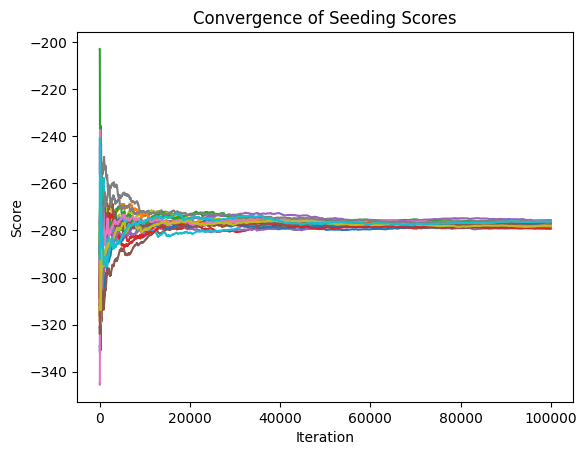

In [39]:
for mean, std in zip(means, stds):
    plt.plot(np.array(mean) - np.array(std))
plt.title("Convergence of Seeding Scores")
plt.xlabel("Iteration")
plt.ylabel("Score")

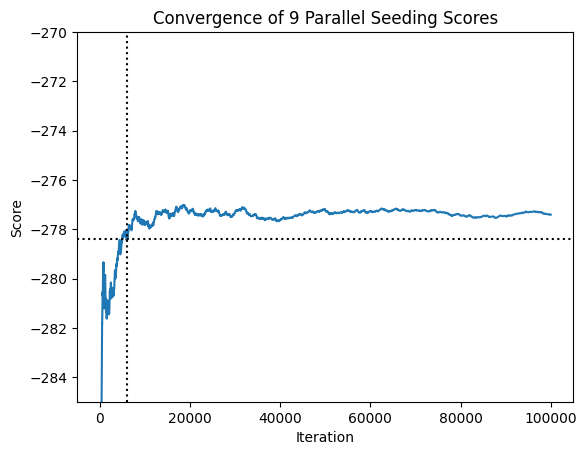

In [49]:
sscores = np.array(means) - np.array(stds)
sscores = np.mean(sscores[:10, :], axis=0)
plt.plot(sscores)
plt.title("Convergence of 9 Parallel Seeding Scores")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.ylim(-285, -270)
plt.axvline(x=6000, c="black", linestyle="dotted")
plt.axhline(y=sscores[5999], c="black", linestyle="dotted")